In [15]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [16]:
# Description:
#   Exercise5 notebook.
#
# Copyright (C) 2018 Santiago Cortes, Juha Ylioinas
#
# This software is distributed under the GNU General Public 
# Licence (version 2 or later); please refer to the file 
# Licence.txt, included with the software, for details.

# Preparations
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Select data directory
if os.path.isdir('/coursedata'):
    course_data_dir = '/coursedata'
elif os.path.isdir('../data'):
    course_data_dir = '../data'
else:
    # Specify course_data_dir on your machine
    course_data_dir = '/home/jovyan/work/coursedata/'

print('The data directory is %s' % course_data_dir)
data_dir = os.path.join(course_data_dir, 'exercise-05-data/')
print('Data stored in %s' % data_dir)

The data directory is /coursedata
Data stored in /coursedata/exercise-05-data/


# CS-E4850 Computer Vision Exercise Round 5

Remember to do the pen and paper assignments given in Exercise05task1.pdf.

The problems should be solved before the exercise session and solutions returned via
MyCourses. Upload to MyCourses both: this Jupyter Notebook (.ipynb) file containing your solutions to the programming tasks and the exported pdf version of this Notebook file. If there are both programming and pen & paper tasks kindly combine the two pdf files (your scanned/LaTeX solutions and the exported Notebook) into a single pdf and submit that with the Notebook (.ipynb) file. <br><br> Note that you should be sure that everything that you need to implement should work with the pictures specified by the assignments of this exercise round.

## Robust line fitting using RANSAC.

Run the example script robustLineFitting, which plots a set of points $(x_i,y_i), i=1,\ldots,n$, and estimate a line that best fits to these points by implementing a RANSAC approach as explained in the slides of Lecture 4:


Repeat the following steps $N$ times (set $N$ large enough according to the guidelines given in the lecture):

- Draw 2 points uniformly at random from set $(x_i,y_i)$.

- Fit a line to these 2 points.

- Determine the inliers to this line among the remaining points (i.e.\ points whose distance to the line is less
than a suitably set threshold $t$).


Take the line with most inliers from previous stage and refit it using total least squares fitting to all inliers.
Plot the estimated line and all the points $(x_i,y_i)$ to the same figure and report the estimated values of the line's coefficients.


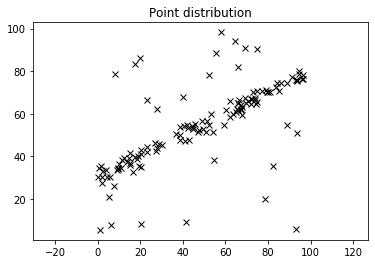

In [17]:
# Load and plot points
data = np.load(data_dir+'points.npy')
x, y = data[0,:], data[1,:]
plt.plot(x, y, 'kx')
plt.title('Point distribution')
plt.axis('equal')
plt.show()


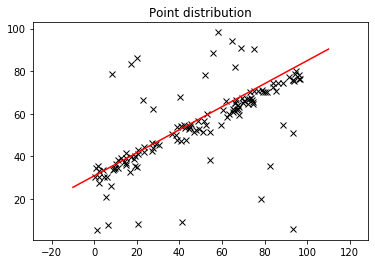

In [23]:
## Robust line fitting
##--your-code-starts-here--##

N = 1000
t = 3
inrange = 0
most_inrange = 0
coefficient = 0, 0
 
#Draw 2 points uniformly
def draw_points():
    random_num = np.random.randint(low=0, high=99, size=2)
    if random_num[0] == random_num[1]:
        return draw_points()
    else:
        return random_num
    
for _ in range(N):
    i1, i2 = draw_points()
    x1, y1 = x[i1], y[i1]
    x2, y2 = x[i2], y[i2]
    
##Fit a line to these 2 points.    
    p = (y2 - y1) / (x2 - x1)
    b = (x2*y1 - x1*y2) / (x2 - x1)
    
##points whose distance to the line is less than a suitably set threshold t
    for other_i in range(len(x)):
        if other_i not in (i1, i2):
            x_p, y_p = x[other_i], y[other_i] 
            distance = np.absolute(-p*x_p + y_p -b)
            if distance <= t:
                inrange += 1
    
    if inrange > most_inrange:
        most_inrange = inrange
        coefficient = p, b
        
#print(most_inlier)
#print(coefficient)

plt.plot(x, y, 'kx')
plt.title('Point distribution')
plt.axis('equal')

x_range = np.linspace(-10,110)
plt.plot(x_range, coefficient[0]*x_range + coefficient[1], color='red')
plt.show()

##--your-code-ends-here--##

## Line detection by Hough transform. (Just a demo, no points given)

Run the example cell below, which illustrates line detection by Hough transform using opencv built-in functions.

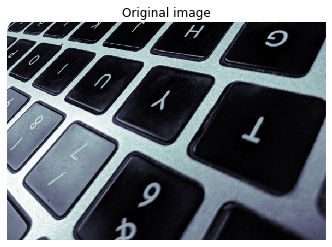

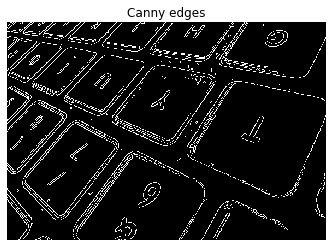

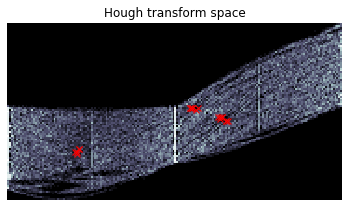

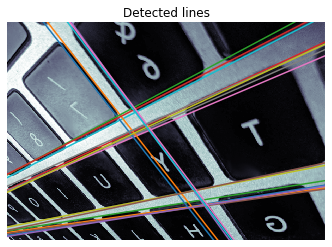

In [25]:

#DEMO CELL
# Logistic sigmoid function
def sigm(x):
    return 1 / (1 + np.exp(-x))


# This demo detects the Canny edges for the input image,
# calculates the Hough transform for the Canny edge image,
# displays the Hough votes in an acculumator array
# and finally draws the detected lines

# Read image
I = cv2.imread(data_dir+'board.png', 0)
r, c = I.shape

plt.figure(1)
plt.imshow(I, cmap='bone')
plt.title('Original image')
plt.axis('off')
# Find Canny edges. The input image for cv2.HoughLines should be
# a binary image, so a Canny edge image will do just fine.
# The Canny edge detector uses hysteresis thresholding, where
# there are two different threshold levels.
edges = cv2.Canny(I, 80, 130)
plt.figure(2)
plt.imshow(edges, cmap='gray')
plt.title('Canny edges')
plt.axis('off')
# Compute the Hough transform for the binary image returned by cv2.Canny
# cv2.HoughLines returns 2-element vectors containing (rho, theta)
# cv2.HoughLines(input image, radius resolution(pixels), angular resolution (radians),treshold )
H = cv2.HoughLines(edges, 0.5, np.pi/180, 5)

# Display the transform
theta = H[:,0,1].ravel()
rho = H[:,0,0].ravel()

# Create an acculumator array and the bin coordinates for voting
x_coord = np.arange(0, np.pi, np.pi/180)
y_coord = np.arange(np.amin(rho), np.amax(rho)+1, (np.amax(rho)+1)/50)

acc = np.zeros([np.size(y_coord),np.size(x_coord)])

# Perform the voting
for i in range(np.size(theta)):
    x_id = np.argmin(np.abs(x_coord-theta[i]))
    y_id = np.argmin(np.abs(y_coord-rho[i]))
    acc[y_id, x_id] +=  1

# Pass the values through a logistic sigmoid function and normalize
# (only for the purpose of better visualization)
#acc = sigm(acc)
acc /= np.amax(acc)

plt.figure(3)
plt.imshow(acc,cmap='bone')
plt.axis('off')

plt.title('Hough transform space')

# Compute the Hough transform with higher threshold 
# for displaying ~30 strongest peaks in the transform space
H2 = cv2.HoughLines(edges, 1, np.pi/180, 150)

x2 = H2[:,:,1].ravel()
y2 = H2[:,:,0].ravel()

# Superimpose a plot on the image of the transform that identifies the peaks
plt.figure(3)
for i in range(np.size(x2)):
    x_id = np.argmin(abs(x_coord-x2[i]))
    y_id = np.argmin(abs(y_coord-y2[i]))
    plt.plot(x_id, y_id, 'xr','Linewidth',0.1)
    
# Visualize detected lines on top of the Canny edges.
plt.figure(4)
plt.imshow(I, cmap='bone')
plt.title('Detected lines')
plt.axis('off')


for ind in range(0,len(H2)):
    line=H2[ind,0,:]
    rho=line[0]
    theta=line[1]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    plt.plot((x1,x2),(y1,y2))
    
#plt.plot(xk, yk, 'm-')
plt.xlim([0,np.size(I,1)])
plt.ylim([0,np.size(I,0)])
plt.show()

